# Milestone 4

In [1]:
# imports
import pandas as pd
import os
import warnings
warnings.filterwarnings('ignore')

Connection Definition

In [2]:
# Env query for connection string
CONNECTION_STRING = os.environ.get('AZURE_SQL_CONNECTIONSTRING')

Check Connection & Config

In [7]:
import pyodbc

try:
    AZD_connection = pyodbc.connect(CONNECTION_STRING)
    # AZD_cursor = AZD_connection.cursor()
    # AZD_connection.getinfo()
    print(AZD_connection.getinfo(pyodbc.SQL_DATABASE_NAME))
    print(AZD_connection.getinfo(pyodbc.SQL_DBMS_NAME))
    print(AZD_connection.getinfo(pyodbc.SQL_DBMS_VER))
    AZD_connection.close()

except Exception as e:
    print("Error while connecting to Azure SQL", e)

ie3700
Microsoft SQL Server
12.00.0429


In [8]:
# define query execution to return df
def search(query:str) -> pd.DataFrame:
    connection = pyodbc.connect(CONNECTION_STRING)
    cursor = connection.cursor()
    cursor.execute(query)
    data = cursor.fetchall()
    df = pd.DataFrame(data)
    connection.close()
    return df

In [48]:
search("""
SELECT TOP 15 * FROM Parent_Risk;
""").values.tolist()

[[(1, 'Data Breach', 'Risk of sensitive data exposure', 1, 1)],
 [(2, 'Market Volatility', 'Unstable market conditions', 2, 2)],
 [(3, 'Brand Damage', 'Negative publicity or scandal', 3, 3)],
 [(4, 'Regulatory Non-compliance', 'Failure to comply with laws', 4, 4)],
 [(5, 'Business Disruption', 'Unexpected disruptions in operations', 5, 5)],
 [(6, 'Regulatory Non-compliance', 'Unexpected disruptions in operations', 4, 15)],
 [(7, 'Regulatory Non-compliance', 'Unstable market conditions', 2, 1)],
 [(8, 'Data Breach', 'Unstable market conditions', 5, 16)],
 [(9, 'Business Disruption', 'Unexpected disruptions in operations', 5, 71)],
 [(10, 'Regulatory Non-compliance', 'Unstable market conditions', 3, 6)],
 [(11, 'Data Breach', 'Risk of sensitive data exposure', 102, 37)],
 [(12, 'Business Disruption', 'Risk of sensitive data exposure', 2, 85)],
 [(13, 'Business Disruption', 'Failure to comply with laws', 4, 14)],
 [(14, 'Business Disruption', 'Unexpected disruptions in operations', 5, 19)

In [40]:
q = search("""\
SELECT TOP 10 * FROM Sub_Risk;
""").values.tolist()

for a in q:
    record = a[0]
    print("{" + 
        #   """ _id: {}, Name: "{}",  Description: "{}" """
        #   """ """
        #   """ """
        #   """ """
        #   """ """
        #   """ """
        #   """ """
        #   """ """
        #   """ """
        #   """ """
        #   """ """
        #   """ """
          """ _id: {}, Name: "{}", Description: "{}",  Parent_Risk_ID: {}, Register_ID: {} """
        #   """ _id: {}, Name: "{}", Description: "{}", Category_ID: {}, Register_ID: {} """
            .format(
                record[0], 
                record[1], 
                record[2],
                record[3],
                record[4]
                )
                + "},")

{ _id: 1, Name: "Hacking Attempt", Description: "Unauthorized access to systems",  Parent_Risk_ID: 1, Register_ID: 1 },
{ _id: 2, Name: "Stock Crash", Description: "Sudden drop in stock prices",  Parent_Risk_ID: 2, Register_ID: 2 },
{ _id: 3, Name: "Social Media Backlash", Description: "Negative social media coverage",  Parent_Risk_ID: 3, Register_ID: 3 },
{ _id: 4, Name: "Missed Reporting Deadlines", Description: "Failure to report on time",  Parent_Risk_ID: 4, Register_ID: 4 },
{ _id: 5, Name: "Natural Disasters", Description: "Floods, earthquakes impacting business",  Parent_Risk_ID: 5, Register_ID: 5 },


Visualizations

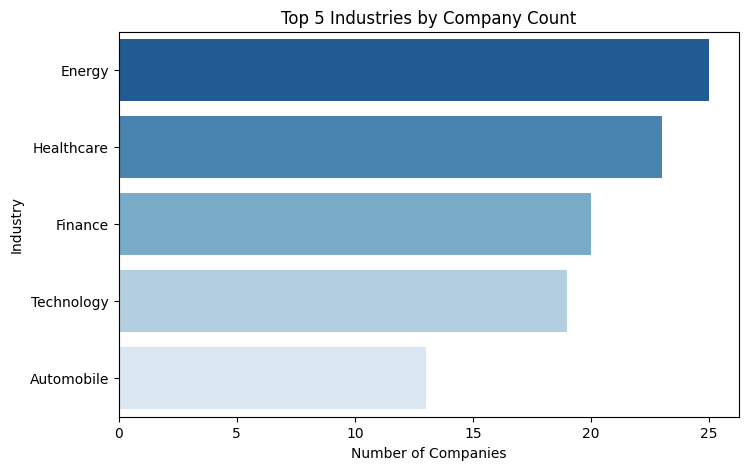

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

sql_top_industries = """
SELECT Industry, COUNT(ID) as Company_Count
FROM Company
GROUP BY Industry
ORDER BY Company_Count DESC;
"""
df = search(sql_top_industries)

# output formatting
data = pd.DataFrame(columns=["Industry", "Company_Count"])
for i ,row in df.iterrows():
    data.loc[i,"Industry"] = row[0][0]
    data.loc[i,"Company_Count"] = row[0][1]


def plot_top_industries(df):
    plt.figure(figsize=(8, 5))
    sns.barplot(x=df['Company_Count'], y=df['Industry'], palette='Blues_r')
    plt.xlabel('Number of Companies')
    plt.ylabel('Industry')
    plt.title('Top 5 Industries by Company Count')
    plt.show()


plot_top_industries(df= data)


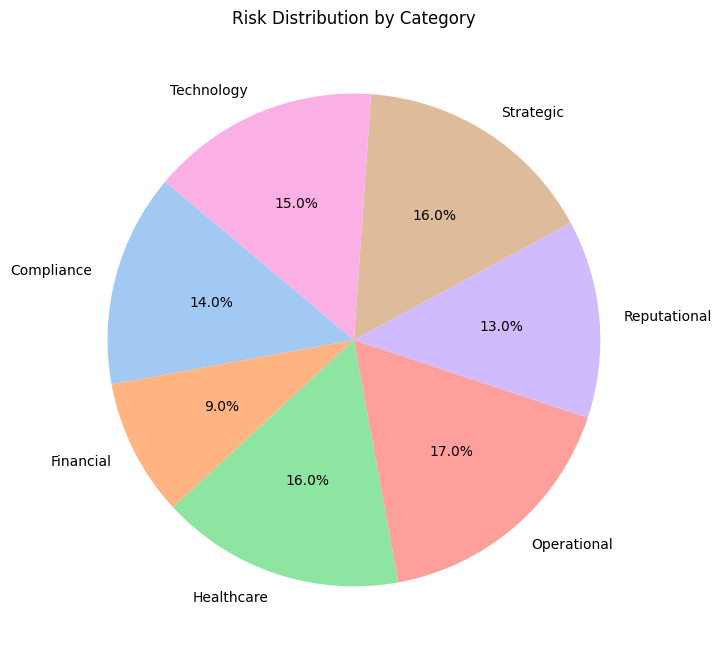

In [15]:
sql_risk_by_category = """
SELECT c.Name AS Category, COUNT(pr.ID) AS Risk_Count
FROM Parent_Risk pr
JOIN Category c ON pr.Category_ID = c.ID
GROUP BY c.Name;
"""

df = search(sql_risk_by_category)

# output formatting
data = pd.DataFrame(columns=["Category", "Risk_Count"])
for i ,row in df.iterrows():
    data.loc[i,"Category"] = row[0][0]
    data.loc[i,"Risk_Count"] = row[0][1]

def plot_risk_by_category(df):
    plt.figure(figsize=(8, 8))
    plt.pie(df['Risk_Count'], labels=df['Category'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
    plt.title('Risk Distribution by Category')
    plt.show()

plot_risk_by_category(df=data)

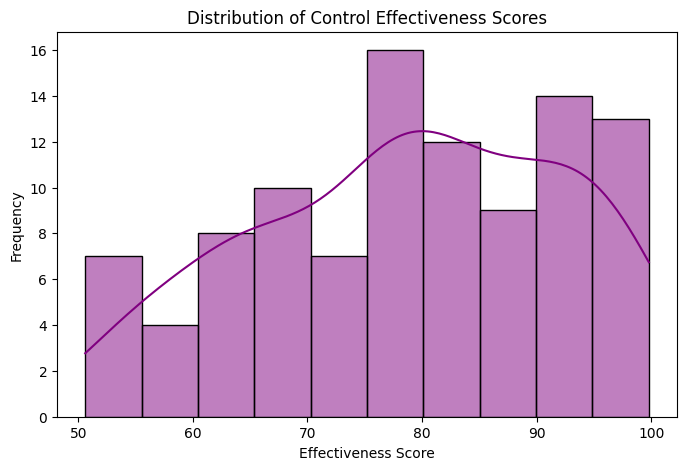

In [16]:
sql_control_effectiveness = """
SELECT Effectiveness_Score
FROM Controls;
"""

df = search(sql_control_effectiveness)

# output formatting
data = pd.DataFrame(columns=["Effectiveness_Score"])
for i ,row in df.iterrows():
    data.loc[i,"Effectiveness_Score"] = row[0][0]


def plot_control_effectiveness(df):
    plt.figure(figsize=(8, 5))
    sns.histplot(df['Effectiveness_Score'], bins=10, kde=True, color='purple')
    plt.xlabel('Effectiveness Score')
    plt.ylabel('Frequency')
    plt.title('Distribution of Control Effectiveness Scores')
    plt.show()

plot_control_effectiveness(df=data)

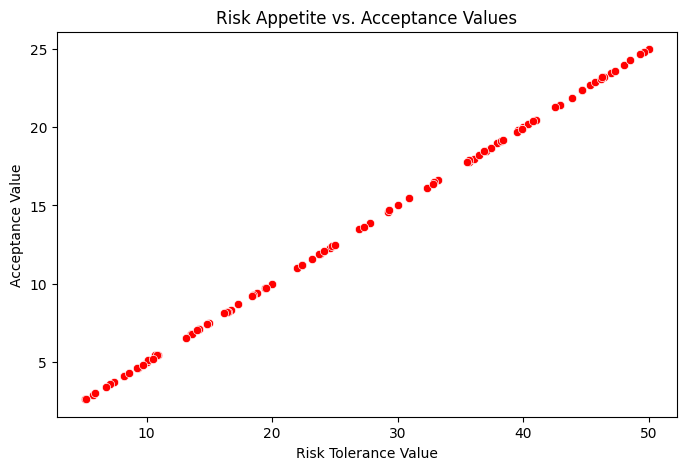

In [17]:
sql_risk_appetite_vs_acceptance = """
SELECT Tolerance_Val, Acceptance_Value
FROM Appetite;
"""
df = search(sql_risk_appetite_vs_acceptance)

# output formatting
data = pd.DataFrame(columns=["Effectiveness_Score"])
for i ,row in df.iterrows():
    data.loc[i,"Tolerance_Val"] = row[0][0]
    data.loc[i,"Acceptance_Value"] = row[0][1]


def plot_risk_appetite_vs_acceptance(df):
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=df['Tolerance_Val'], y=df['Acceptance_Value'], color='red')
    plt.xlabel('Risk Tolerance Value')
    plt.ylabel('Acceptance Value')
    plt.title('Risk Appetite vs. Acceptance Values')
    plt.show()

plot_risk_appetite_vs_acceptance(df= data)

In [ ]:
from datetime import datetime

# Define SQL queries categorized
sql_queries = {
    "01_simple_query.sql": """-- Simple Query
-- List all companies in Europe
SELECT Name, Country, Industry
FROM Company
WHERE Region = 'Europe';
""",

    "02_aggregate_query.sql": """-- Aggregate Query
-- Count of companies per region
SELECT Region, COUNT(*) AS Company_Count
FROM Company
GROUP BY Region;
""",

    "03_join_queries.sql": """-- Inner Join
SELECT R.Name AS Risk, SR.Name AS Sub_Risk
FROM Risk R
INNER JOIN Sub_Risk SR ON R.Sub_Risk_ID = SR.ID;

-- Left Join
SELECT SR.Name AS Sub_Risk, R.Name AS Risk
FROM Sub_Risk SR
LEFT JOIN Risk R ON SR.ID = R.Sub_Risk_ID;
""",

    "04_nested_query.sql": """-- Nested Query
SELECT Name
FROM Company
WHERE ID IN (
    SELECT Company_ID
    FROM Risk_Register
    WHERE ID IN (
        SELECT Register_ID
        FROM Appetite
        WHERE Tolerance_Val > 25
    )
);
""",

    "05_correlated_query.sql": """-- Correlated Query
SELECT C1.Description, C1.Effectiveness_Score
FROM Controls C1
WHERE C1.Effectiveness_Score > (
    SELECT AVG(C2.Effectiveness_Score)
    FROM Controls C2
    WHERE C2.Register_ID = C1.Register_ID
);
""",

    "06_all_any_exists.sql": """-- > ALL
SELECT Description
FROM Controls
WHERE Effectiveness_Score > ALL (
    SELECT Effectiveness_Score
    FROM Controls
    WHERE ID != Controls.ID
);

-- EXISTS
SELECT Name, Email
FROM User_Account UA
WHERE EXISTS (
    SELECT 1
    FROM Assessments A
    WHERE A.User_ID = UA.ID
);

-- NOT EXISTS
SELECT C.Name
FROM Company C
WHERE NOT EXISTS (
    SELECT 1
    FROM Assessment_Company_Impact ACI
    WHERE ACI.Company_ID = C.ID
);
""",

    "07_union_query.sql": """-- Union Query
SELECT Name AS Item FROM Risk
UNION
SELECT Description FROM Controls;
""",

    "08_subqueries_in_select_from.sql": """-- Subquery in SELECT
SELECT 
    Description,
    Effectiveness_Score,
    (SELECT AVG(C2.Effectiveness_Score)
     FROM Controls C2
     WHERE C2.Register_ID = C1.Register_ID) AS Avg_Effectiveness
FROM Controls C1;

-- Subquery in FROM
SELECT RegisterStats.Register_ID, RegisterStats.AvgScore
FROM (
    SELECT Register_ID, AVG(Effectiveness_Score) AS AvgScore
    FROM Controls
    GROUP BY Register_ID
) AS RegisterStats;
"""
}

# Write files to a zip
from zipfile import ZipFile
import os

timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
zip_filename = f"sql_query_examples_{timestamp}.zip"
zip_path = f"/mnt/data/{zip_filename}"

with ZipFile(zip_path, 'w') as zipf:
    for filename, content in sql_queries.items():
        filepath = f"/mnt/data/{filename}"
        with open(filepath, "w") as f:
            f.write(content)
        zipf.write(filepath, arcname=filename)

zip_path
